# Neural Network with Tensorflow of MNIST

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.8.0


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
tf.reset_default_graph()

In [19]:

x_data = tf.placeholder(tf.float32, [None, 784])
y_target = tf.placeholder(tf.float32, [None, 10])
        
pkeep = tf.placeholder(tf.float32)

In [31]:
# five layers and their number of neurons (tha last layer has 10 softmax neurons)
L = 256
M = 128
N = 64
O = 32
# Weights initialised with small random values between -0.2 and +0.2
# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
X = tf.reshape(x_data, [-1, 28*28])
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1))  # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)

Y1 = tf.nn.relu(tf.matmul(X, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)


W3 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B3 = tf.Variable(tf.ones([N])/10)
Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

W4 = tf.Variable(tf.truncated_normal([N, O], stddev=0.1))
B4 = tf.Variable(tf.ones([O])/10)
Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)


W5 = tf.Variable(tf.truncated_normal([O, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))
Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=y_target)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [32]:
global_step = tf.Variable(0,trainable=False)

# training step,
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, global_step, 2000, 1/math.e)
optimizer = tf.train.AdamOptimizer(lr).minimize(cross_entropy)


In [33]:
init=tf.global_variables_initializer()
merged_summary = tf.summary.merge_all()
batch_size = 64

In [46]:
train_acc=[]
test_acc=[]
with tf.Session() as sess:
    # Initialize all Variables
    sess.run(init)
   
    for epoch in range(10001):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #Run the optimizer
        sess.run(optimizer, feed_dict={x_data:batch_x, y_target:batch_y,pkeep:.70})  
    
   
        # Print the Loss/Error after every 10000 epochs
        if epoch%1000 == 0:
            acc_train,err_train= sess.run([accuracy,cross_entropy], 
                                          feed_dict={x_data:batch_x, y_target:batch_y,pkeep:1.0})   
            acc_test,err_test= sess.run([accuracy,cross_entropy],
                                        feed_dict={x_data: mnist.test.images, y_target:mnist.test.labels,pkeep:1.0})
            
            train_acc.append(acc_train)
            test_acc.append(acc_test)
        
            print('Epoch:{0}, Train loss:{1},Train acc:{2},Validation loss:{3},Validation acc:{4},'.format(
                epoch,err_train,acc_train,err_test,acc_test))

            
            

Epoch:0, Train loss:221.69842529296875,Train acc:0.3125,Validation loss:228.4597625732422,Validation acc:0.13050000369548798,
Epoch:1000, Train loss:7.763820171356201,Train acc:0.984375,Validation loss:15.789013862609863,Validation acc:0.9560999870300293,
Epoch:2000, Train loss:7.375000953674316,Train acc:0.96875,Validation loss:13.320260047912598,Validation acc:0.9646999835968018,
Epoch:3000, Train loss:5.90589714050293,Train acc:0.984375,Validation loss:11.216448783874512,Validation acc:0.9725000262260437,
Epoch:4000, Train loss:2.5519819259643555,Train acc:1.0,Validation loss:11.375288009643555,Validation acc:0.9718999862670898,
Epoch:5000, Train loss:8.411947250366211,Train acc:0.984375,Validation loss:11.358916282653809,Validation acc:0.972599983215332,
Epoch:6000, Train loss:3.8344595432281494,Train acc:0.984375,Validation loss:11.713078498840332,Validation acc:0.972000002861023,
Epoch:7000, Train loss:0.4712226688861847,Train acc:1.0,Validation loss:9.519905090332031,Validation 

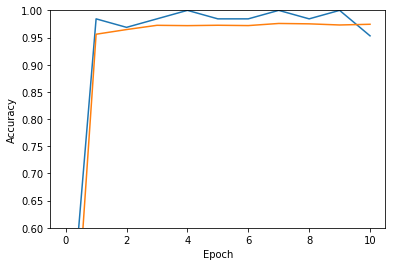

In [47]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.6,1)
plt.plot(train_acc)
plt.plot(test_acc)